# Load the image data

Read image data, create training set and save the data in numpy array as pickle file

Original dataset: https://www.kaggle.com/luisblanche/covidct?select=CT_COVID

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 # image operations

In [6]:
# Read an image
DATADIR = "C:\\Users\\Bauyrjan.Jyenis\\Datasets\\covid"
DIRECTORY = ["covid_negative", "covid_positive"]

for folder in DIRECTORY:
    path = os.path.join(DATADIR, folder)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        break

In [7]:
img_array.shape

(335, 580)

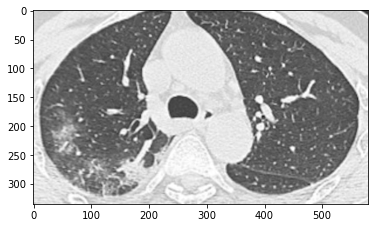

In [8]:
# Visualize the image
_ = plt.imshow(img_array, cmap="gray")
_ = plt.show

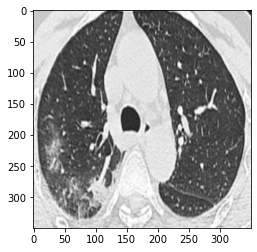

In [9]:
# Reduce the resolution of the images as needed
img_size=350
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [10]:
new_array.shape

(350, 350)

In [11]:
# Create your training data set
training_data=[]
img_size=100
def create_training_data():
    for folder in DIRECTORY:
        path = os.path.join(DATADIR, folder)
        label = DIRECTORY.index(folder)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, label])
            except Exception as e:
                pass
create_training_data()

In [13]:
len(training_data[0])

2

In [18]:
# Shuffle them to get a good mix of different labels
import random
random.shuffle(training_data)

In [19]:
# View the mix after shuffling
for sample in training_data[:3]:
    print(sample[1])

0
1
0


In [20]:
# Seperate features and labels into separate arrays
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

In [21]:
# reshape as required by Tensorlow/Keras
X = np.array(X).reshape(-1,img_size, img_size, 1)

In [48]:
X.shape

(746, 100, 100, 1)

In [53]:
X = X/255

In [56]:
# reshape as required by Tensorflow/Keras
y = np.array(y).reshape(-1,1)

In [57]:
# Save the data
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [58]:
# Read the data from pickle file
pickle_in = open("X.pickle", "rb")
h = pickle.load(pickle_in)

In [59]:
h.shape

(746, 100, 100, 1)